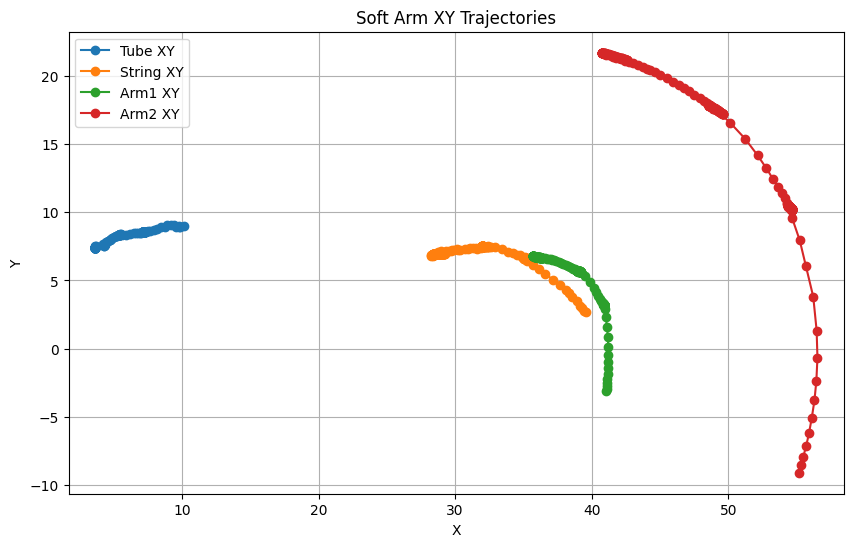

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('softarm.csv')

# Plot tube, string, and arm tip XY positions over time if available
plt.figure(figsize=(10, 6))

plt.plot(df['tube_x'], df['tube_y'], 'o-', label='Tube XY')
plt.plot(df['string_x'], df['string_y'], 'o-', label='String XY')
plt.plot(df['arm1_x'], df['arm1_y'], 'o-', label='Arm1 XY')
plt.plot(df['arm2_x'], df['arm2_y'], 'o-', label='Arm2 XY')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Soft Arm XY Trajectories')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


Arm angle crosses zero at time t = 1.8361 s
index 8


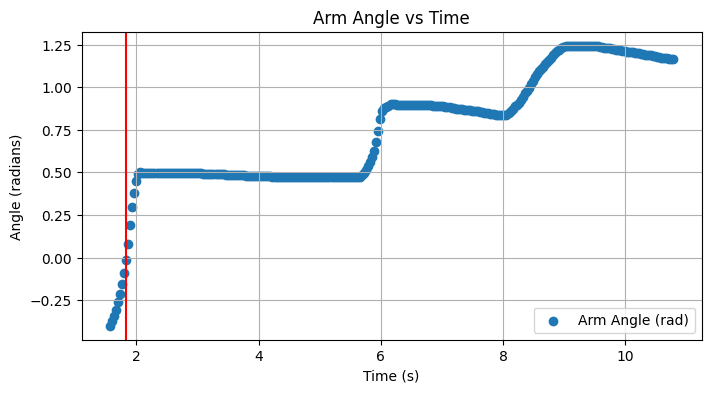

In [2]:
import numpy as np
armx = df['arm2_x']-df['arm1_x']
army = df['arm2_y']-df['arm1_y']
armangle = np.arctan2(army, armx)
plt.figure(figsize=(8,4))
plt.scatter(df['t'], armangle, label='Arm Angle (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Arm Angle vs Time')
plt.grid(True)
plt.legend()

zero_idx = 0
crossings = np.where(np.diff(np.sign(armangle)) != 0)[0]
for idx in crossings:
    # Linear interpolation for better crossing estimate
    t0, t1 = df['t'].iloc[idx], df['t'].iloc[idx+1]
    a0, a1 = armangle[idx], armangle[idx+1]
    if a1 != a0:
        zero_cross_time = t0 - a0 * (t1 - t0) / (a1 - a0)
    else:
        zero_cross_time = t0
    print(f"Arm angle crosses zero at time t = {zero_cross_time:.4f} s")
    print(f"index {idx}")
    zero_idx = idx

plt.gca().axvline(zero_cross_time, color='red')


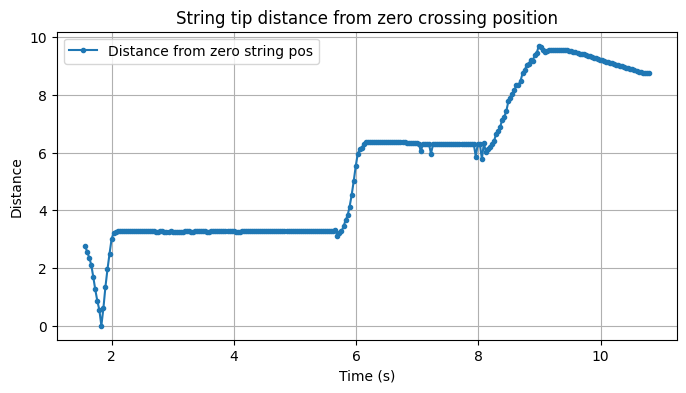

In [3]:
zero_string_pos = np.array([df['string_x'][zero_idx], df['string_y'][zero_idx]])
string_pos = np.vstack([df['string_x'], df['string_y']]).T
dist_from_zero = np.linalg.norm(string_pos - zero_string_pos, axis=1)
plt.figure(figsize=(8,4))
plt.plot(df['t'], dist_from_zero, marker='o', markersize=3, label='Distance from zero string pos')
plt.xlabel('Time (s)')
plt.ylabel('Distance')
plt.title('String tip distance from zero crossing position')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_88589/3651129768.py:7: RuntimeWarning: invalid value encountered in arccos
  theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)


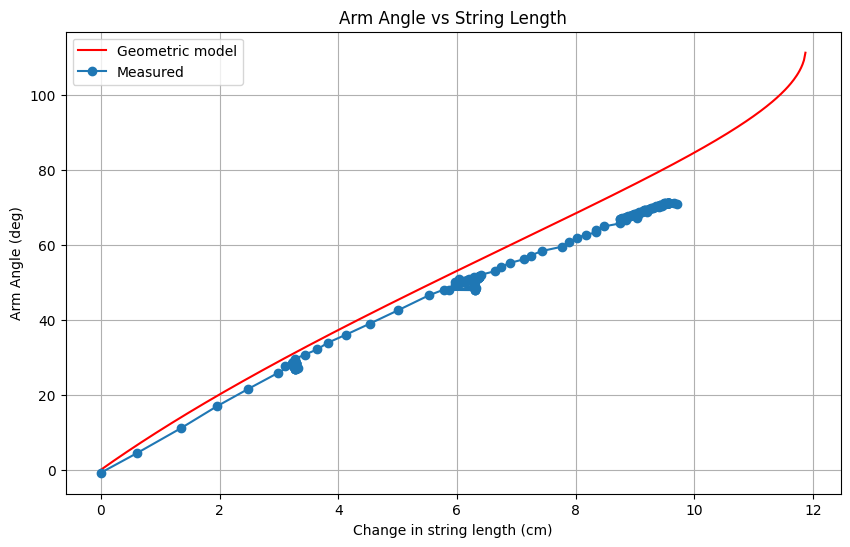

In [31]:
plt.figure(figsize=(10,6))
mask = df['t']+0.01 >= zero_cross_time

a, b, r = 11, 5.5, 5.1
s = np.linspace(0, 12.165, 500)

theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
plt.plot(s, np.degrees(theta_r_s), linestyle='-', color='red', label='Geometric model')

plt.plot(dist_from_zero[mask], np.degrees(armangle[mask]), marker='o', linestyle='-', color='tab:blue', label='Measured')



plt.xlabel('Change in string length (cm)')
plt.ylabel('Arm Angle (deg)')
plt.title('Arm Angle vs String Length')
plt.grid(True)
plt.legend()


# plt.xlim(-0.1, 0.1)
# plt.ylim(-0.1, 0.1)


/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_88589/3060837937.py:20: RuntimeWarning: invalid value encountered in arccos
  theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_88589/3060837937.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)


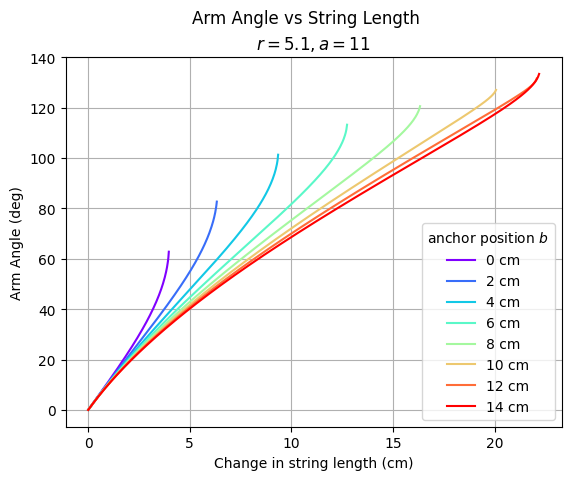

In [71]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.figure()
mask = df['t']+0.01 >= zero_cross_time

a, b, r = 11, 5.5, 5.1
# s = np.linspace(0, 12.165, 500)
# s = np.linspace(0, 15, 500)

for a in [11]:

    b_vals = np.linspace(0, 14, 8)
    cmap = cm.rainbow
    norm = mcolors.Normalize(vmin=b_vals.min(), vmax=b_vals.max())

    for b in b_vals:
        s = np.linspace(0, a+b, 500)

        theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
        color = cmap(norm(b))
        plt.plot(s, np.degrees(theta_r_s), linestyle='-', color=color, label=f'{b:.0f} cm')

plt.xlabel('Change in string length (cm)')
plt.ylabel('Arm Angle (deg)')
plt.suptitle('Arm Angle vs String Length')
plt.title("$r=5.1, a=11$")
plt.grid(True)
plt.legend(loc='lower right', title='anchor position $b$')


# plt.xlim(-0.1, 0.1)
# plt.ylim(-0.1, 0.1)


/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_88589/3617147643.py:22: RuntimeWarning: invalid value encountered in arccos
  theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_88589/3617147643.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)


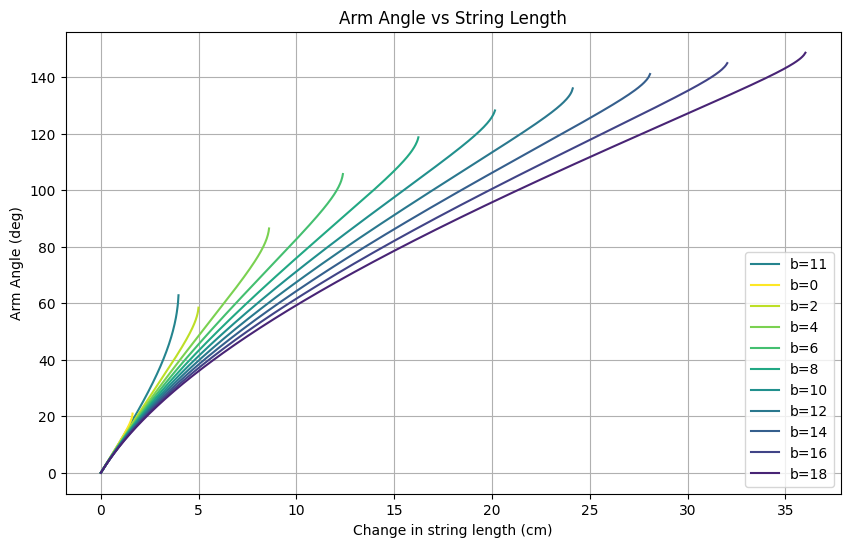

In [37]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.figure(figsize=(10,6))
mask = df['t']+0.01 >= zero_cross_time

a, b, r = 11, 5.5, 5.1
# s = np.linspace(0, 12.165, 500)
# s = np.linspace(0, 15, 500)

for a in [11]:

    b_vals = np.linspace(0, 20, 11)
    cmap = cm.viridis_r
    norm = mcolors.Normalize(vmin=b_vals.min(), vmax=b_vals.max())

    for b in b_vals:
        s = np.linspace(0, a+b, 500)

        a, b = b, a

        theta_r_s = np.arccos(((a+b-s)**2 - a**2 - b**2 - 2*r**2) / (2 * np.sqrt((a**2 + r**2) * (b**2 + r**2)))) - np.arctan(r/a) - np.arctan(r/b)
        color = cmap(norm(b))
        plt.plot(s, np.degrees(theta_r_s), linestyle='-', color=color, label=f'b={b:.0f}')

plt.xlabel('Change in string length (cm)')
plt.ylabel('Arm Angle (deg)')
plt.title('Arm Angle vs String Length')
plt.grid(True)
plt.legend(loc='lower right')


# plt.xlim(-0.1, 0.1)
# plt.ylim(-0.1, 0.1)
